In [57]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [58]:
bank = pd.read_csv("bank-full (1).csv",sep=';')

In [59]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [60]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [62]:
bank.skew()

C:\Users\pprat\AppData\Local\Temp\ipykernel_6704\1297534500.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [63]:
bank.kurt()

C:\Users\pprat\AppData\Local\Temp\ipykernel_6704\844940576.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.kurt()


age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [64]:
bank.shape

(45211, 17)

In [65]:
bank[bank.duplicated()]   #duplicate value check

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [66]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [67]:
bank=pd.get_dummies(bank,columns=['job','marital','default','housing','loan','education','contact','poutcome','month'])
bank['y']=bank['y'].replace('yes',1)
bank['y']=bank['y'].replace('no',0)
bank

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [68]:
#train test split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [70]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
model

LogisticRegression()

In [72]:
model.score(x_test,y_pred)

0.9165708219056887

In [73]:
cm = confusion_matrix(y,pred)
cm

array([[42765,   182],
       [  410,  1854]], dtype=int64)

In [74]:
(472765+1854)/(42765+182+410+1854)

10.497865563690253

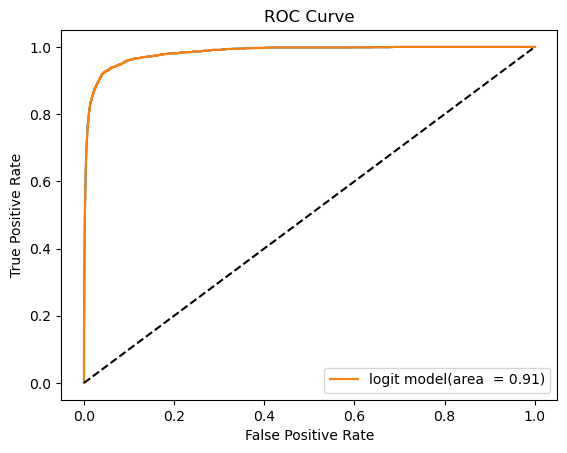

auc accuracy: 0.9073334060940097


In [79]:
fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr)
auc=roc_auc_score(y,pred)

plt.title('ROC Curve')
plt.plot(fpr,tpr,label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('auc accuracy:',auc)
